In [1]:
import matplotlib.pyplot as plt

In [2]:
import jax.numpy as jnp
from jax import jit
import jax

In [3]:
@jit
def func(x):
    return -(1.4 - 3.0 * x) * jnp.sin(18.0 * x)

In [4]:
grid = jnp.linspace(0, 1, num=1_000).reshape(-1, 1)

In [5]:
f = func(grid)

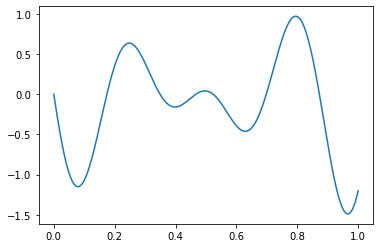

In [6]:
plt.plot(grid, f)

In [7]:
x = jax.random.uniform(key=jax.random.PRNGKey(1), shape=(10_000, 1))

error = 0.5 * jax.random.normal(key=jax.random.PRNGKey(0), shape=(10_000, 1))

In [8]:
y = func(x) + error

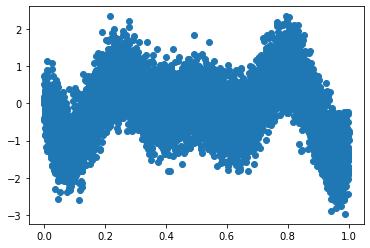

In [9]:
plt.scatter(x, y)

In [10]:
from nnet.network import build_network
from nnet.data import TrainTestContainer
from nnet.data import Data

from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

In [24]:
network = build_network(
    structure=[1, 5, 5, 5, 5, 1],
    loss_type="mean_square",
    activation_type="relu",
    algorithm="adam",
    problem="regression",
    tqdm=tqdm,
    step_size=0.001
)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

data = TrainTestContainer(
    train=Data(images=x_train, labels=y_train), test=Data(images=x_test, labels=y_test)
)

In [26]:
result = network.fit(data, n_epochs=1, batch_size=1_000)

Training:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/8 [00:00<?, ?it/s]

In [27]:
pred = network.predict(result.params, grid)

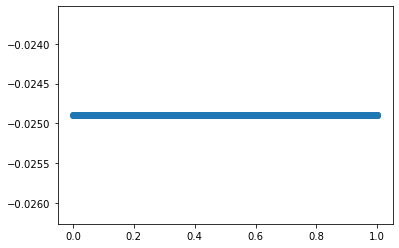

In [28]:
plt.scatter(grid, pred)

In [29]:
pred = network.predict(result.params, data.test.labels)

In [30]:
pred

DeviceArray([[-0.02489688],
             [-0.02489687],
             [-0.02489688],
             ...,
             [-0.02489688],
             [-0.02489687],
             [-0.02489687]], dtype=float32)